In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 18})
import seaborn as sns
import regex as re
import os
import numpy as np

from ast import literal_eval

In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
result_paths = [
    "/mnt/extra/continuous-training/results_fixed/1717700456995308991/",
    "/mnt/extra/continuous-training/results_fixed/1717444793172840349/",
    "/mnt/extra/continuous-training/results_fixed/1717705984940495539/",
    "/mnt/extra/continuous-training/results_fixed/1717575413839183617/",
    # "/mnt/extra/continuous-training/results_fixed/1717467553842856231/",
    "/mnt/extra/continuous-training/results/1718057739541878219",
    "/mnt/extra/continuous-training/results_fixed/1717575369578062901/",
    "/mnt/extra/continuous-training/results_fixed/1717579388065196179/",
    "/mnt/extra/continuous-training/results_fixed/1717701022363026467/",
    "/mnt/extra/continuous-training/results_fixed/1717608769994081703/",
    "/mnt/extra/continuous-training/results_fixed/1717579439091810476/",
    "/mnt/extra/continuous-training/results_fixed/1717587649593441377/",
    "/mnt/extra/continuous-training/results_fixed/1717700529336249757/",
    "/mnt/extra/continuous-training/results_fixed/1717635454957034095/",
    # "/mnt/extra/continuous-training/results_fixed/1717446231823791885/",
    "/mnt/extra/continuous-training/results_fixed/1717448773806529718/",
    "/mnt/extra/continuous-training/results_fixed/1717612290915437273/",
    "/mnt/extra/continuous-training/results_fixed/1717594617566228467/",
    "/mnt/extra/continuous-training/results_fixed/1717478686265173993/",
    "/mnt/extra/continuous-training/results_fixed/1717619549666300929/",
    "/mnt/extra/continuous-training/results_fixed/1717704913915861438/",
    # "/mnt/extra/continuous-training/results_fixed/1717456543236185969/",
    "/mnt/extra/continuous-training/results/1718057735112524876",
    "/mnt/extra/continuous-training/results_fixed/1717715829899615491/",
]

In [4]:
stats_df = pd.DataFrame(columns=['folder_path', 'algo', 'param_path', 'csv_path', 'latencies_path', 'num_retrain', 'training_time_total', 'training_time_single', 'training_cpu_time', 'training_counter', 'inference_time_total', 'inference_time_single', 'inference_cpu_time', 'inference_counter'])
for stat in result_paths:
    contents = []
    with open(os.path.join(stat, 'parameters.txt'), "r") as f:
        contents = f.readlines()
    # Iterate to get variables
    folder_path = stat
    algo_name = ''
    csv_path = ''
    latencies_path = os.path.join(folder_path, 'latencies.csv')
    param_path = stat
    valid_entry = False
    retrained = -1
    training_time_total = -1
    training_time_single = -1
    training_cpu_time = -1
    training_counter = -1
    inference_time_total = -1
    inference_time_single = -1
    inference_cpu_time = -1
    inference_counter = -1
    for content in contents:
        if not valid_entry and 'Inference' in content:
            valid_entry = True
        if '-output' in content:
            try:
                algo_name = content.split(' = ')[1].split('\n')[0]
            except:
                algo_name = content.split('=')[1].split('\n')[0]
            csv_path = os.path.join(algo_name+'.csv')
        if 'Retrained' in content:
            retrained = float(content.split(' = ')[1].split('\n')[0])
        if 'Training time total' in content:
            training_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Training time single' in content:
            training_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Training CPU times usage' in content:
            training_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Training counter' in content:
            training_counter = float(content.split(' = ')[1].split('\n')[0])
        if 'Inference time total' in content:
            inference_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference time single' in content:
            inference_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference CPU times usage' in content:
            inference_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Inference counter' in content:
            inference_counter = float(content.split(' = ')[1].split('\n')[0])
    if valid_entry:
        stats_df.loc[len(stats_df)] = [folder_path, algo_name, param_path, csv_path, latencies_path, retrained, training_time_total, training_time_single, training_cpu_time, training_counter, inference_time_total, inference_time_single, inference_cpu_time, inference_counter]
stats_df

,folder_path,algo,param_path,csv_path,latencies_path,num_retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results_fixed/1...,dt_clf_noretrain,/mnt/extra/continuous-training/results_fixed/1...,dt_clf_noretrain.csv,/mnt/extra/continuous-training/results_fixed/1...,0.0,7.395818,7.395818,7.56,1.0,128.376732,3.251560e-07,397.05,394815847.0
1,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_ip_based,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_ip_based.csv,/mnt/extra/continuous-training/results_fixed/1...,9.0,582.992192,58.299219,1725.61,10.0,9826.975631,2.489002e-05,31892.29,394815847.0
2,/mnt/extra/continuous-training/results_fixed/1...,dt_clf_noretrain_5monitor,/mnt/extra/continuous-training/results_fixed/1...,dt_clf_noretrain_5monitor.csv,/mnt/extra/continuous-training/results_fixed/1...,0.0,7.406685,7.406685,18.26,1.0,125.934814,3.213507e-07,163.70,391892160.0
3,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_psi,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_psi.csv,/mnt/extra/continuous-training/results_fixed/1...,0.0,145.642166,145.642166,691.02,1.0,10833.957692,2.744053e-05,55048.01,394815847.0
4,/mnt/extra/continuous-training/results/1718057...,nn_clf_quartile,/mnt/extra/continuous-training/results/1718057...,nn_clf_quartile.csv,/mnt/extra/continuous-training/results/1718057...,16.0,547.334069,32.196122,3937.17,17.0,5427.356001,1.374655e-05,27204.20,394815847.0
5,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_kl,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_kl.csv,/mnt/extra/continuous-training/results_fixed/1...,479.0,20196.405196,42.075844,102592.25,480.0,7998.590941,2.025904e-05,32207.66,394815847.0
6,/mnt/extra/continuous-training/results_fixed/1...,nn_period_8,/mnt/extra/continuous-training/results_fixed/1...,nn_period_8.csv,/mnt/extra/continuous-training/results_fixed/1...,60.0,2697.606778,44.223062,16688.89,61.0,10685.934880,2.706562e-05,55504.60,394815847.0
7,/mnt/extra/continuous-training/results_fixed/1...,model_zoo_sample_dt,/mnt/extra/continuous-training/results_fixed/1...,model_zoo_sample_dt.csv,/mnt/extra/continuous-training/results_fixed/1...,0.0,240.152132,8.005071,781.03,30.0,185.076186,5.054935e-07,481.71,366129722.0
8,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_js,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_js.csv,/mnt/extra/continuous-training/results_fixed/1...,187.0,8183.487942,43.529191,39744.92,188.0,10674.916581,2.703771e-05,46866.09,394815847.0
9,/mnt/extra/continuous-training/results_fixed/1...,nurd,/mnt/extra/continuous-training/results_fixed/1...,nurd.csv,/mnt/extra/continuous-training/results_fixed/1...,-1.0,2268.060755,2268.060755,14153.80,1.0,891.047034,2.256867e-06,6156.50,394815847.0


In [5]:
import numpy as np

def plot_cdf(latencies_acc, all_latencies):
    # Draw CDF
    N=len(latencies_acc)
    data = latencies_acc
    # sort the data in ascending order
    x_1 = np.sort(data)
    # get the cdf values of y
    y_1 = np.arange(N) / float(N)

    y_test = all_latencies
    N=len(y_test)
    data = y_test
    # sort the data in ascending order
    x_2 = np.sort(data)
    # get the cdf values of y
    y_2 = np.arange(N) / float(N)
    percent_slow = int( (N-len(data)) / N * 100)

    # plotting
    plt.figure(figsize=(4,3))
    plt.xlabel('Latency (us)')
    plt.ylabel('CDF')
    p70_lat = np.percentile(x_2, 70)
    plt.xlim(0, max(p70_lat * 3, 1000)) # Hopefully the x axis limit can catch the tail
    plt.ylim(0, 1) 
    plt.plot(x_2, y_2, label = "Raw Latency", color="red")
    plt.plot(x_1, y_1, label = "Model Reweight", linestyle='dashdot', color="green")
    plt.legend(loc="lower right")
    plt.show()

In [6]:
values_df_1 = pd.DataFrame({
    'path': pd.Series(dtype='string'),
    'algo': pd.Series(dtype='string'),
    'length': pd.Series(dtype='int'),
    'f1': pd.Series(dtype='object'),
    'roc_auc': pd.Series(dtype='object'),
    # 'latencies_acc': pd.Series(dtype='object'),
    # 'latencies_rej': pd.Series(dtype='object'),
    'retrain': pd.Series(dtype='int'),
    'training_time_total': pd.Series(dtype='float'),
    'training_time_single': pd.Series(dtype='float'),
    'training_cpu_time': pd.Series(dtype='float'),
    'training_counter': pd.Series(dtype='int'),
    'inference_time_total': pd.Series(dtype='float'),
    'inference_time_single': pd.Series(dtype='float'),
    'inference_cpu_time': pd.Series(dtype='float'),
    'inference_counter': pd.Series(dtype='int'),
})

for i, row in stats_df.iterrows():
    if 'monitor' not in row['algo']:
        print(i, row['algo'])
        temp_df = pd.read_csv(os.path.join(row['folder_path'], row['csv_path']), index_col=0)
        temp_df = temp_df.drop_duplicates(subset='minute', keep="last")
        retrain_list = temp_df['retrain'].tolist()
        retrain = [i for i in retrain_list if i==True]
        # latencies_df = pd.read_csv(row['latencies_path'], header=None, names=['latency', 'reject'], dtype={'latency': int, 'reject': str})
        # latencies_acc = latencies_df[latencies_df['reject'].isin(["0", "True"])]['latency'].tolist()
        # latencies_rej = latencies_df[latencies_df['reject'].isin(["1", "False"])]['latency'].tolist()
        # all_latencies = latencies_acc
        # all_latencies.extend(latencies_rej)
        # plot_cdf(latencies_acc, all_latencies)
        # if temp_df['minute'].max() == 480:
        # if i != 3:
        #     values_df_1.loc[len(values_df_1)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist()[:-5], temp_df['roc_auc'].tolist()[:-5], row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]
        # else:
        values_df_1.loc[len(values_df_1)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist(), temp_df['roc_auc'].tolist(), row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]

# print(values_df_1.iloc[13]['path'])
# values_df_1.drop([13], inplace=True)
values_df_1.reset_index(inplace=True, drop=True)
# values_df_1.to_csv('values_all_minmax_latencies.csv')
values_df_1

0 dt_clf_noretrain
1 nn_clf_ip_based
3 nn_clf_psi
4 nn_clf_quartile
5 nn_clf_kl
6 nn_period_8
7 model_zoo_sample_dt
8 nn_clf_js
9 nurd
10 nn_clf_dd_nn
11 nn_clf_noretrain
12 nn_period_1
13 nn_clf_ph
14 nn_period_2
15 nn_period_4
16 nn_clf_labeler
17 model_zoo_sample
19 nn_clf_outlier
20 nn_clf_ks


,path,algo,length,f1,roc_auc,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results_fixed/1...,dt_clf_noretrain,480,"[0.9994849988248726, 0.8964198340028163, 0.885...","[0.9994138156517904, 0.7936983252156622, 0.796...",0.0,7.395818,7.395818,7.56,1.0,128.376732,3.251560e-07,397.05,394815847.0
1,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_ip_based,480,"[0.9167082654370858, 0.9141628534509446, 0.903...","[0.7888175926597607, 0.7873075904653973, 0.794...",9.0,582.992192,58.299219,1725.61,10.0,9826.975631,2.489002e-05,31892.29,394815847.0
2,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_psi,480,"[0.914981888558092, 0.912084331385732, 0.90033...","[0.7757803722096196, 0.7734655107930415, 0.781...",0.0,145.642166,145.642166,691.02,1.0,10833.957692,2.744053e-05,55048.01,394815847.0
3,/mnt/extra/continuous-training/results/1718057...,nn_clf_quartile,480,"[0.9152922472483797, 0.91257513939127, 0.90085...","[0.7768792099061272, 0.7750986345788897, 0.782...",16.0,547.334069,32.196122,3937.17,17.0,5427.356001,1.374655e-05,27204.20,394815847.0
4,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_kl,480,"[0.9148132108923608, 0.9157947436186836, 0.904...","[0.7732485379714995, 0.7984171487014365, 0.842...",479.0,20196.405196,42.075844,102592.25,480.0,7998.590941,2.025904e-05,32207.66,394815847.0
5,/mnt/extra/continuous-training/results_fixed/1...,nn_period_8,480,"[0.9172867523784136, 0.9144861202224176, 0.903...","[0.790789952793865, 0.7889673387135964, 0.7956...",60.0,2697.606778,44.223062,16688.89,61.0,10685.934880,2.706562e-05,55504.60,394815847.0
6,/mnt/extra/continuous-training/results_fixed/1...,model_zoo_sample_dt,480,"[0.999868643940244, 0.8039533908113423, 0.7804...","[0.9998574806651472, 0.7064619429418658, 0.695...",0.0,240.152132,8.005071,781.03,30.0,185.076186,5.054935e-07,481.71,366129722.0
7,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_js,480,"[0.918882039947814, 0.9162108233675476, 0.9055...","[0.7959408052069242, 0.7935271401629446, 0.800...",187.0,8183.487942,43.529191,39744.92,188.0,10674.916581,2.703771e-05,46866.09,394815847.0
8,/mnt/extra/continuous-training/results_fixed/1...,nurd,480,"[0.0681294816331881, 0.0721397712738599, 0.066...","[0.513556243375378, 0.5144237185776803, 0.5134...",-1.0,2268.060755,2268.060755,14153.80,1.0,891.047034,2.256867e-06,6156.50,394815847.0
9,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_dd_nn,480,"[0.917535585118758, 0.914870131699636, 0.90371...","[0.7898381877864555, 0.7876834436917228, 0.794...",0.0,171.041479,171.041479,996.99,1.0,11449.620697,2.899990e-05,57326.43,394815847.0


In [7]:
algorithms_name = {
    "nn_clf_ks": "KS-Test",
    "nn_period_8": "8min",
    "nn_period_4": "4min",
    "nn_clf_psi": "PSI",
    "nn_clf_noretrain": "NoRetrain-NN",
    "nn_clf_outlier": "Outlier",
    "nn_clf_ph": "PageHinkley",
    "nn_period_2": "2min",
    "nn_clf_ip_based": "IP-based",
    "nn_period_1": "1min",
    "model_zoo_sample": "Reuse-NN",
    "model_zoo_sample_dt": "Reuse-DT",
    "nn_clf_js": "JS-Div",
    "nn_clf_quartile": "Quartile",
    "nn_clf_labeler": "Labeler",
    "nn_clf_kl": "KL-Div",
    "nurd": "Reweight",
    "dt_clf_noretrain": "NoRetrain-DT",
    "nn_clf_dd_nn": "ModelDD",
    "dt_clf_noretrain_2monitor": "NoRetrain-DT2",
    "dt_clf_noretrain_5monitor": "NoRetrain-DT5",
}

algorithms_color = {
    "nn_clf_ks": "darkgreen",
    "nn_period_8": "red",
    "nn_period_4": "indianred",
    "nn_clf_psi": "forestgreen",
    "nn_clf_noretrain": "grey",
    "nn_clf_outlier": "orange",
    "nn_clf_ph": "limegreen",
    "nn_period_2": "brown",
    "nn_clf_ip_based": "gold",
    "nn_period_1": "darkred",
    "model_zoo_sample": "blueviolet",
    "model_zoo_sample_dt": "violet",
    "nn_clf_js": "lime",
    "nn_clf_quartile": "goldenrod",
    "nn_clf_labeler": "darkorange",
    "nn_clf_kl": "lawngreen",
    "nurd": "hotpink",
    "dt_clf_noretrain": "black",
    "nn_clf_dd_nn": "magenta",
    "dt_clf_noretrain_2monitor": "dimgrey",
    "dt_clf_noretrain_5monitor": "silver",
}

algorithms_marker = {
    "nn_clf_ks": "*",
    "nn_period_8": "X",
    "nn_period_4": ",",
    "nn_clf_psi": "D",
    "nn_clf_noretrain": 9,
    "nn_clf_outlier": "o",
    "nn_clf_ph": "x",
    "nn_period_2": "v",
    "nn_clf_ip_based": "+",
    "nn_period_1": "1",
    "model_zoo_sample": ".",
    "model_zoo_sample_dt": "8",
    "nn_clf_js": "^",
    "nn_clf_quartile": "<",
    "nn_clf_labeler": ">",
    "nn_clf_kl": "P",
    "nurd": "o",
    "dt_clf_noretrain": "p",
    "nn_clf_dd_nn": "2",
    "dt_clf_noretrain_2monitor": "3",
    "dt_clf_noretrain_5monitor": "4",
}

In [8]:
df_plot = values_df_1.copy(deep=True)
# df_plot = df_plot[~df_plot['algo'].str.contains('monitor')]
df_plot.sort_values(by=['retrain'], ascending=[True], inplace=True)
df_plot.reset_index(inplace=True, drop=True)
df_plot.loc[df_plot['algo'] == 'nurd', 'retrain'] = 0
df_plot

,path,algo,length,f1,roc_auc,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results_fixed/1...,nurd,480,"[0.0681294816331881, 0.0721397712738599, 0.066...","[0.513556243375378, 0.5144237185776803, 0.5134...",0.0,2268.060755,2268.060755,14153.80,1.0,891.047034,2.256867e-06,6156.50,394815847.0
1,/mnt/extra/continuous-training/results_fixed/1...,dt_clf_noretrain,480,"[0.9994849988248726, 0.8964198340028163, 0.885...","[0.9994138156517904, 0.7936983252156622, 0.796...",0.0,7.395818,7.395818,7.56,1.0,128.376732,3.251560e-07,397.05,394815847.0
2,/mnt/extra/continuous-training/results_fixed/1...,model_zoo_sample,480,"[0.9141931885258774, 0.9107644550068624, 0.900...","[0.7808341997847024, 0.7517463458533266, 0.724...",0.0,3959.367266,131.978909,22990.22,30.0,9761.476797,2.666125e-05,40850.90,366129722.0
3,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_noretrain,480,"[0.9137089194892664, 0.9111484083506994, 0.899...","[0.7772600209413139, 0.775661755520527, 0.7829...",0.0,105.942696,105.942696,686.60,1.0,4794.631890,1.214397e-05,10950.17,394815847.0
4,/mnt/extra/continuous-training/results_fixed/1...,model_zoo_sample_dt,480,"[0.999868643940244, 0.8039533908113423, 0.7804...","[0.9998574806651472, 0.7064619429418658, 0.695...",0.0,240.152132,8.005071,781.03,30.0,185.076186,5.054935e-07,481.71,366129722.0
5,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_dd_nn,480,"[0.917535585118758, 0.914870131699636, 0.90371...","[0.7898381877864555, 0.7876834436917228, 0.794...",0.0,171.041479,171.041479,996.99,1.0,11449.620697,2.899990e-05,57326.43,394815847.0
6,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_psi,480,"[0.914981888558092, 0.912084331385732, 0.90033...","[0.7757803722096196, 0.7734655107930415, 0.781...",0.0,145.642166,145.642166,691.02,1.0,10833.957692,2.744053e-05,55048.01,394815847.0
7,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_labeler,480,"[0.9175117190940292, 0.9148142414087588, 0.903...","[0.7859874631416901, 0.7839893423216934, 0.791...",1.0,201.775012,100.887506,782.10,2.0,9277.540507,2.349840e-05,17712.26,394815847.0
8,/mnt/extra/continuous-training/results_fixed/1...,nn_clf_ip_based,480,"[0.9167082654370858, 0.9141628534509446, 0.903...","[0.7888175926597607, 0.7873075904653973, 0.794...",9.0,582.992192,58.299219,1725.61,10.0,9826.975631,2.489002e-05,31892.29,394815847.0
9,/mnt/extra/continuous-training/results/1718057...,nn_clf_quartile,480,"[0.9152922472483797, 0.91257513939127, 0.90085...","[0.7768792099061272, 0.7750986345788897, 0.782...",16.0,547.334069,32.196122,3937.17,17.0,5427.356001,1.374655e-05,27204.20,394815847.0


In [21]:
df_plot_display = df_plot[['algo', 'retrain', 'training_time_total', 'training_cpu_time', 'inference_time_total', 'inference_cpu_time']]
df_plot_display

,algo,retrain,training_time_total,training_cpu_time,inference_time_total,inference_cpu_time
0,dt_clf_noretrain,0.0,7.395818,7.56,128.376732,397.05
1,nn_clf_ip_based,9.0,582.992192,1725.61,9826.975631,31892.29
2,nn_clf_psi,0.0,145.642166,691.02,10833.957692,55048.01
3,nn_clf_quartile,16.0,547.334069,3937.17,5427.356001,27204.20
4,nn_clf_kl,479.0,20196.405196,102592.25,7998.590941,32207.66
5,nn_period_8,60.0,2697.606778,16688.89,10685.934880,55504.60
6,model_zoo_sample_dt,0.0,240.152132,781.03,185.076186,481.71
7,nn_clf_js,187.0,8183.487942,39744.92,10674.916581,46866.09
8,nurd,-1.0,2268.060755,14153.80,891.047034,6156.50
9,nn_clf_dd_nn,0.0,171.041479,996.99,11449.620697,57326.43


In [9]:
flatten_f1 = pd.DataFrame(columns=['Algorithm', 'ROC-AUC'])
for i, row in df_plot.iterrows():
    for f1 in row['roc_auc']:
        flatten_f1.loc[len(flatten_f1)] = [row['algo'], f1]

this_color = [algorithms_color[x] for x in flatten_f1['Algorithm'].unique().tolist()]
this_marker = [algorithms_marker[x] for x in flatten_f1['Algorithm'].unique().tolist()]
this_name = [algorithms_name[x] for x in df_plot['algo'].tolist()]

flatten_f1.head()

,Algorithm,ROC-AUC
0,nurd,0.513556
1,nurd,0.514424
2,nurd,0.513485
3,nurd,0.514654
4,nurd,0.515570


In [11]:
plt.rcParams.update({'font.size': 18})

/tmp/ipykernel_2347224/1467160029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=flatten_f1, x='Algorithm', y='ROC-AUC', palette=this_color, ax=ax, linewidth=0.75)
/tmp/ipykernel_2347224/1467160029.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  vp.set_xticklabels(this_name)


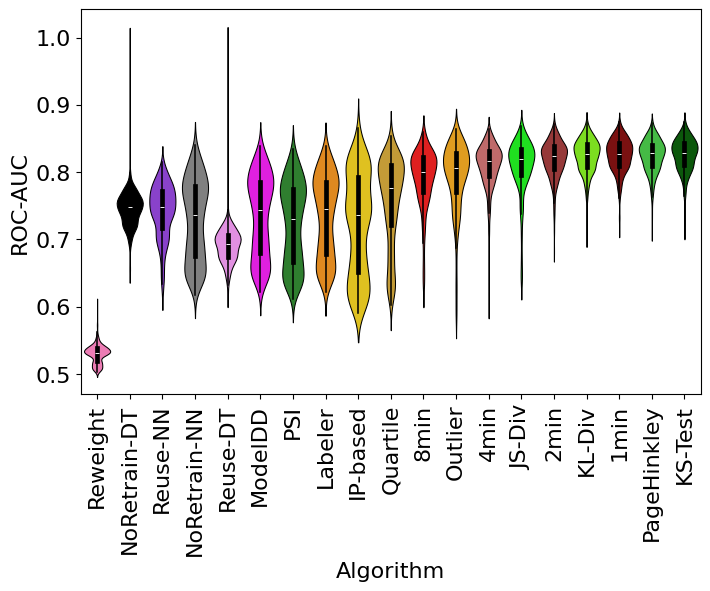

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

vp = sns.violinplot(data=flatten_f1, x='Algorithm', y='ROC-AUC', palette=this_color, ax=ax, linewidth=0.75)
vp.set_xticklabels(this_name)
plt.xticks(rotation=90)
plt.show()

In [18]:
plt.rcParams.update({'font.size': 16})

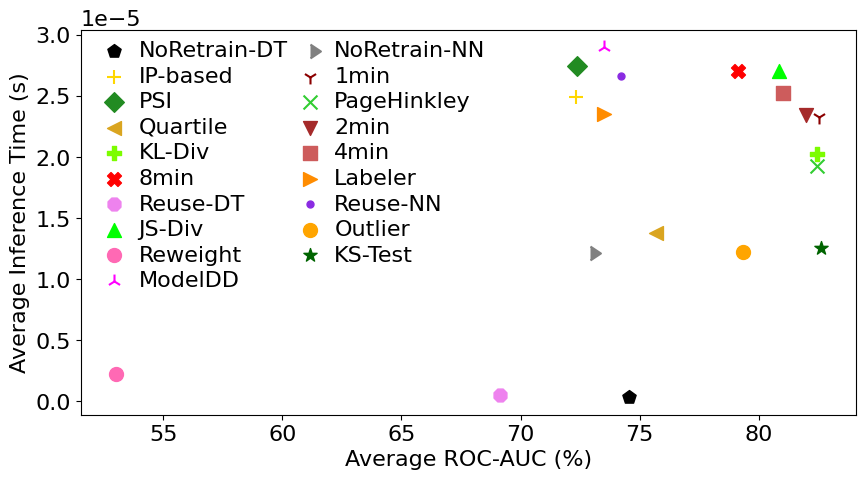

In [11]:
df_plot3 = pd.DataFrame(columns=['algo', 'id', 'retrain', 'average', 'inference_cpu_time', 'inference_time_single', 'color'])

for i, row in values_df_1.iterrows():
    df_plot3.loc[len(df_plot3)] = [row['algo'], algorithms_name[row['algo']], row['retrain'], (sum(row['roc_auc'])/len(row['roc_auc']))*100, row['inference_cpu_time'], row['inference_time_single'], algorithms_color[row['algo']]]

df_plot3['size'] = [100]*len(df_plot3)
df_plot3['marker'] = [algorithms_marker[x] for x in df_plot3['algo'].tolist()]

df_plot3.reset_index(inplace=True, drop=True)

fig, ax = plt.subplots(figsize = (10, 5))

for i, row in df_plot3.iterrows():
    plt.scatter(x=row['average'], y=row['inference_time_single'], s=row['size'], c=row['color'], label=row['id'], marker=row['marker'])
ax.set(xlabel ="Average ROC-AUC (%)", ylabel = "Average Inference Time (s)")

plt.legend(loc='best', ncol=2, labelspacing=0.25, columnspacing=0, borderpad=0, handletextpad=0.1, frameon=False)

plt.show()

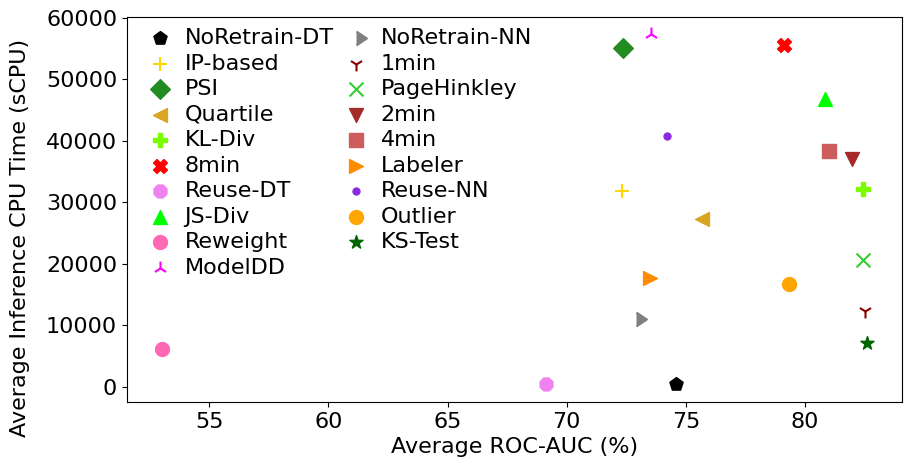

In [12]:
fig, ax = plt.subplots(figsize = (10, 5))

for i, row in df_plot3.iterrows():
    plt.scatter(x=row['average'], y=row['inference_cpu_time'], s=row['size'], c=row['color'], label=row['id'], marker=row['marker'])
ax.set(xlabel ="Average ROC-AUC (%)", ylabel = "Average Inference CPU Time (sCPU)")
ax.yaxis.set_label_coords(-0.125, 0.425)

plt.legend(loc='best', ncol=2, labelspacing=0.25, columnspacing=0, borderpad=0, handletextpad=0.1, frameon=False)

plt.show()

480
480
480
480
480
480
451
480
480
480
480
480
480
480
480
480
451
480
480


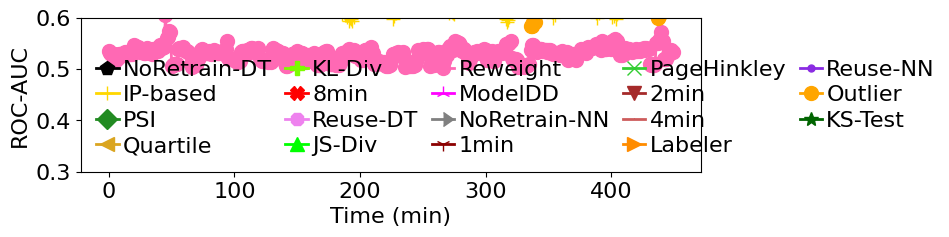

In [14]:
df_plot = values_df_1.copy(deep=True)
df_plot['id'] = df_plot['algo'].apply(lambda x: algorithms_name[x])

plot_df = pd.DataFrame(columns=df_plot['algo'].tolist())
f1s = df_plot['roc_auc'].tolist()
for f1 in f1s:
    print(len(f1))
for i in range(30, 480):
    plot_df.loc[len(plot_df)] = [f1s[0][i], f1s[1][i], f1s[2][i], f1s[3][i], f1s[4][i], f1s[5][i], f1s[6][i-29], f1s[7][i], f1s[8][i], f1s[9][i], f1s[10][i], f1s[11][i], f1s[12][i], f1s[13][i], f1s[14][i], f1s[15][i], f1s[16][i-29], f1s[17][i], f1s[18][i]]

fig, ax = plt.subplots(figsize=(8, 2))

for idx, col in enumerate(plot_df.columns):
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=2, marker=algorithms_marker[col], markersize=10)
plt.legend(ncol=5, loc="best",
           alignment='left', 
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.3, 0.6)
plt.xlabel('Time (min)')
plt.ylabel('ROC-AUC')
plt.show()

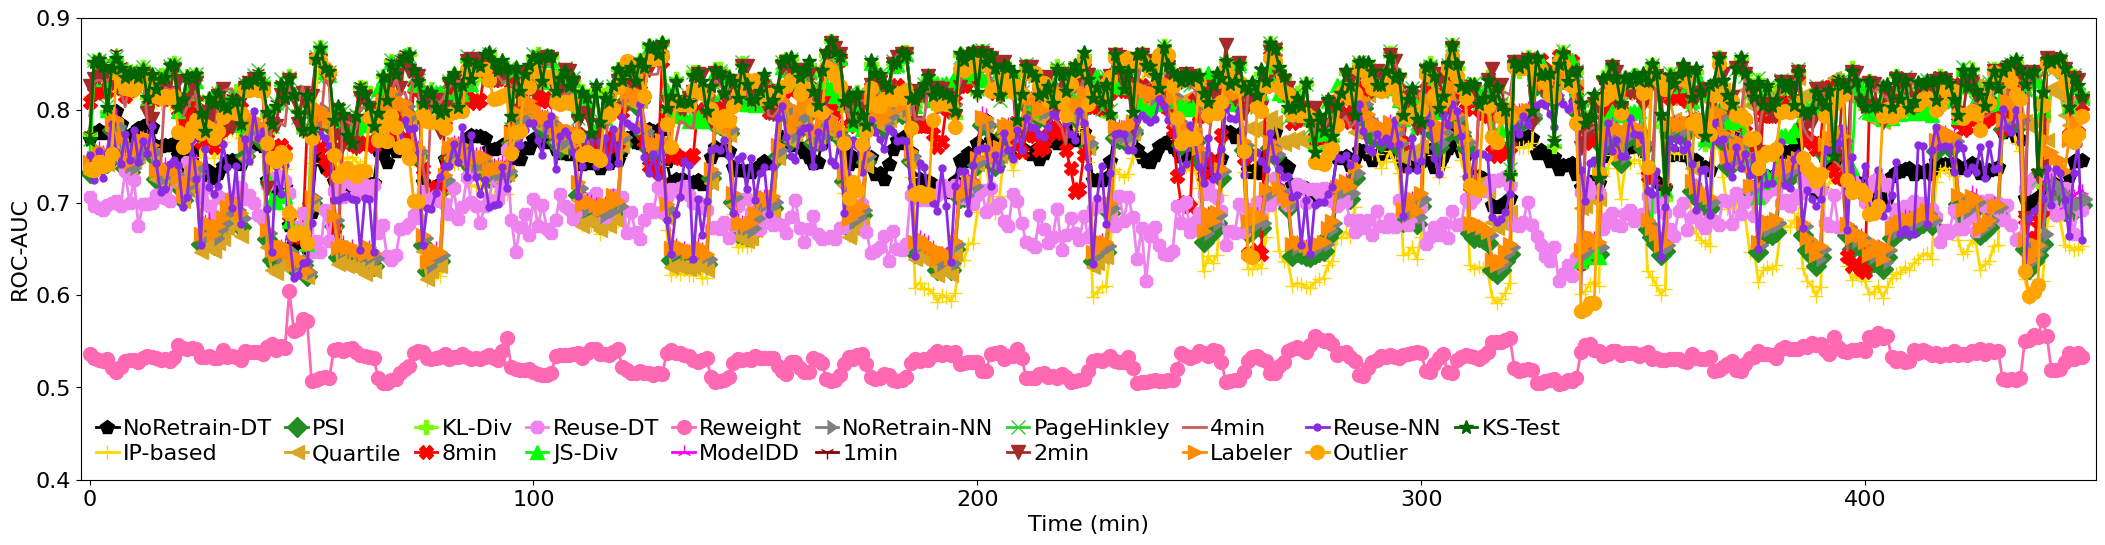

In [20]:
fig, ax = plt.subplots(figsize=(26, 6))

for idx, col in enumerate(plot_df.columns):
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=2, marker=algorithms_marker[col], markersize=10)
plt.legend(ncol=10, loc="best",
           alignment='left', 
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.4, 0.9)
plt.xlim(-2, 452)
plt.xlabel('Time (min)')
plt.ylabel('ROC-AUC')
plt.show()

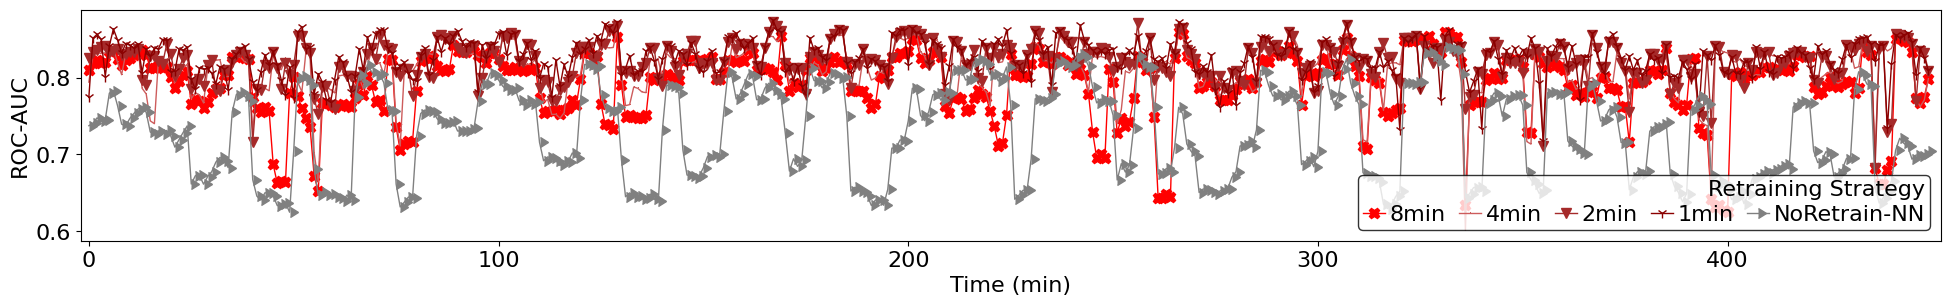

In [24]:
fig, ax = plt.subplots(figsize=(24, 3))
# plot_df.plot()
for col in ['nn_period_8', 'nn_period_4', 'nn_period_2', 'nn_period_1', 'nn_clf_noretrain']:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=5, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
# plt.ylim(0.6, 0.9)
plt.xlim(-2, 452)
plt.xlabel('Time (min)')
plt.ylabel('ROC-AUC')
plt.show()

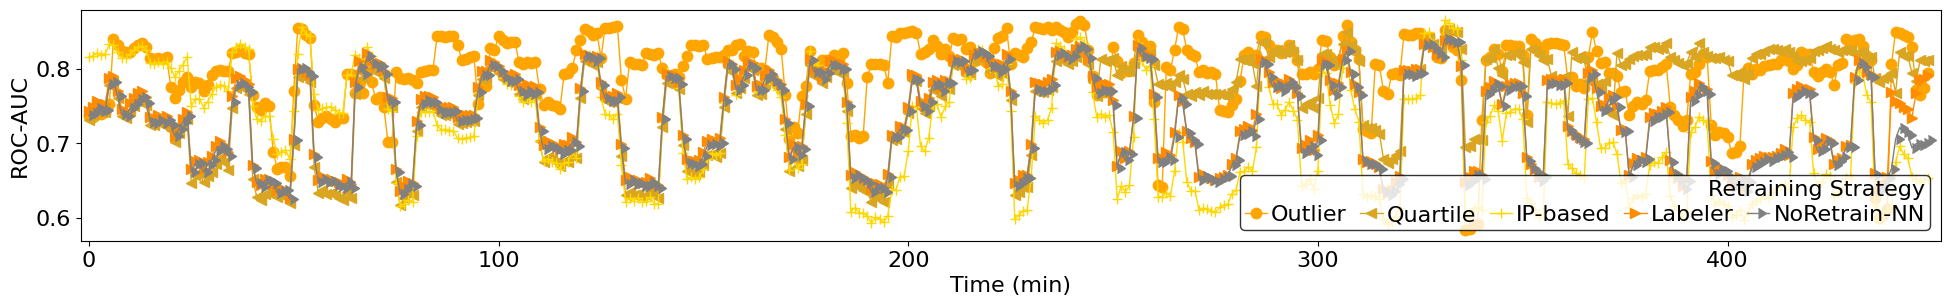

In [25]:
fig, ax = plt.subplots(figsize=(24, 3))
# plot_df.plot()
for col in ['nn_clf_outlier', 'nn_clf_quartile', 'nn_clf_ip_based', 'nn_clf_labeler', 'nn_clf_noretrain']:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=5, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
# plt.ylim(0.6, 0.9)
plt.xlim(-2, 452)
plt.xlabel('Time (min)')
plt.ylabel('ROC-AUC')
plt.show()

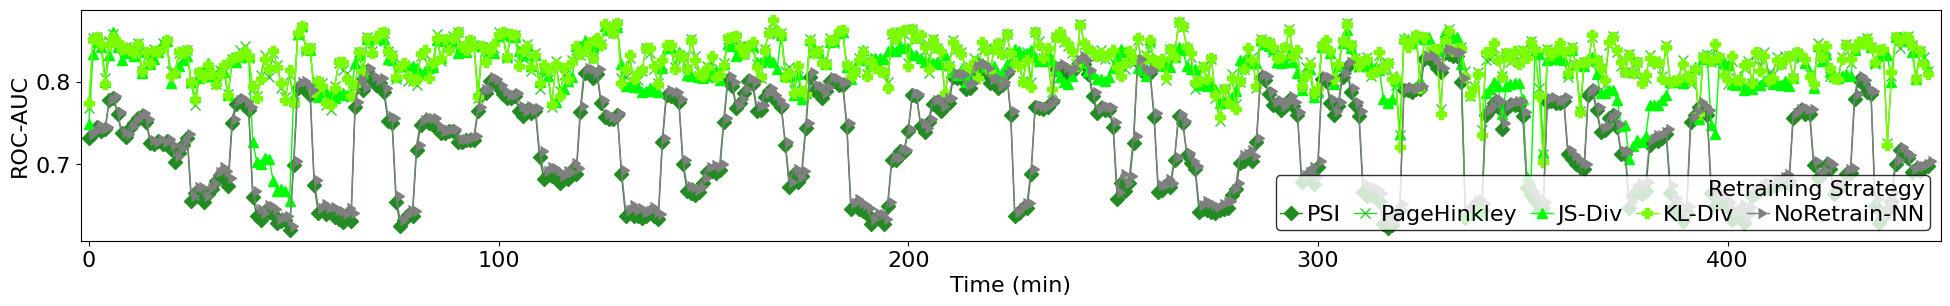

In [26]:
fig, ax = plt.subplots(figsize=(24, 3))
# plot_df.plot()
for col in ['nn_clf_psi', 'nn_clf_ph', 'nn_clf_js', 'nn_clf_kl', 'nn_clf_noretrain']:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=5, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
# plt.ylim(0.6, 0.9)
plt.xlim(-2, 452)
plt.xlabel('Time (min)')
plt.ylabel('ROC-AUC')
plt.show()

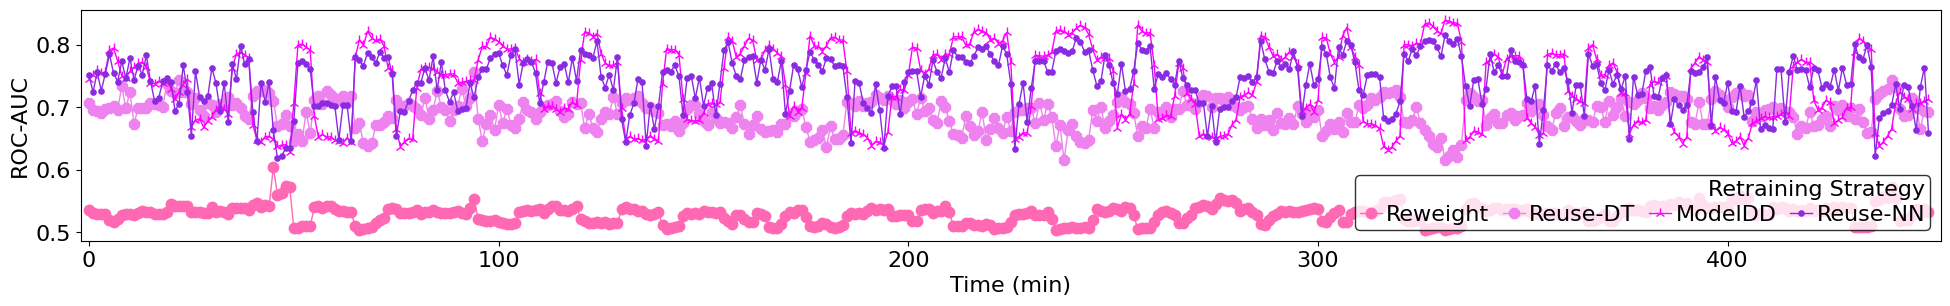

In [28]:
fig, ax = plt.subplots(figsize=(24, 3))
# plot_df.plot()
for col in ['nurd', 'model_zoo_sample_dt', 'nn_clf_dd_nn', 'model_zoo_sample']: # 
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=5, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
# plt.ylim(0.6, 0.9)
plt.xlim(-2, 452)
plt.xlabel('Time (min)')
plt.ylabel('ROC-AUC')
plt.show()

In [ ]:
result_paths_eval_window = {
    "1min": "/mnt/extra/continuous-training/results_fixed/1717700456995308991/",
    "2min": "/mnt/extra/continuous-training/results_fixed/1717704913915861438/",
    "5min": "/mnt/extra/continuous-training/results_fixed/1717705984940495539/",
}